In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv(r"C:\Users\kogla\OneDrive\SWE599-Flight-Ticket-Price-Estimation-Project\merged.csv").drop('Unnamed: 0', axis=1)
df.head()


,company,departure_airport,arrival_airport,departure_time,arrival_time,departure_date,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,SAW,ADB,07:30:00,08:40:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,SAW,ADB,09:20:00,10:30:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,SAW,ADB,20:55:00,22:05:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,SAW,ADB,23:35:00,00:45:00,2022-11-14,539.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,SAW,ADB,09:10:00,10:20:00,2022-11-14,542.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [3]:
df=df.drop(['departure_airport', 'arrival_airport'], axis=1)

In [4]:
df.keys()

Index(['company', 'departure_time', 'arrival_time', 'departure_date',
       'price_try', 'departure_week_day', 'checked_week_day', 'departure_day',
       'departure_month', 'remaining_day_to_flight', 'arrival_city',
       'departure_airport_name', 'departure_hour', 'part_of_day', 'is_weekend',
       'part_of_month', 'duration(min)'],
      dtype='object')

In [5]:
df = df[['company', 'departure_airport_name', 'arrival_city', 'departure_date', 'departure_time','arrival_time',
         'departure_day', 'departure_month', 'departure_hour', 'part_of_day', 'departure_week_day', 'part_of_month','is_weekend','duration(min)',
        'price_try', 'checked_week_day', 'remaining_day_to_flight' ]]


In [6]:
df['company'] = df.company.astype('category')
df['departure_airport_name'] = df.departure_airport_name.astype('category')
df['arrival_city'] = df.arrival_city.astype('category')
df['departure_date'] = pd.to_datetime(df['departure_date'], format='%Y/%m/%d %H:%M:%S')
df['departure_time'] = pd.to_datetime(df['departure_time'],format= '%H:%M:%S' ).dt.time
df['arrival_time'] = pd.to_datetime(df['arrival_time'],format= '%H:%M:%S' ).dt.time
df['part_of_day'] = df.part_of_day.astype('category')
df['departure_week_day'] = df.departure_week_day.astype('category')
df['part_of_month'] = df.part_of_month.astype('category')
df['is_weekend'] = df.is_weekend.astype('category')
df['checked_time'] = pd.to_datetime(df['arrival_time'],format= '%H:%M:%S' ).dt.time
df['checked_week_day'] = df.checked_week_day.astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129513 entries, 0 to 129512
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company                  129513 non-null  category      
 1   departure_airport_name   129513 non-null  category      
 2   arrival_city             129513 non-null  category      
 3   departure_date           129513 non-null  datetime64[ns]
 4   departure_time           129513 non-null  object        
 5   arrival_time             129513 non-null  object        
 6   departure_day            129513 non-null  int64         
 7   departure_month          129513 non-null  int64         
 8   departure_hour           129513 non-null  int64         
 9   part_of_day              129513 non-null  category      
 10  departure_week_day       129513 non-null  category      
 11  part_of_month            129513 non-null  category      
 12  is_weekend      

In [7]:
df_numeric=df.copy()
df_numeric= pd.DataFrame({col: df_numeric[col].astype('category').cat.codes for col in df_numeric}, index=df_numeric.index)

In [8]:
## number of rows
df.shape[0]

129513

In [9]:
## number of columns
df.shape[1]

18

In [10]:
## unique airlines companies
df.company.nunique()

3

In [11]:
arrival_cities=list(df['arrival_city'].value_counts().index)
arrival_cities

['Izmir',
 'Antalya',
 'Ankara',
 'Adana',
 'Trabzon',
 'Gaziantep',
 'Bodrum Milas',
 'Diyarbakir',
 'Dalaman',
 'Hatay',
 'Erzurum',
 'Kars',
 'Mardin']

In [12]:
df.describe()[1:].T

,mean,std,min,25%,50%,75%,max
departure_day,15.505023,8.440833,1.00,8.00,15.00,23.00,30.00
departure_month,11.439099,0.496279,11.00,11.00,11.00,12.00,12.00
departure_hour,13.812760,5.859807,0.00,9.00,14.00,19.00,23.00
duration(min),83.551458,16.610856,60.00,70.00,75.00,100.00,125.00
price_try,875.639935,286.457553,432.99,734.99,869.99,1006.99,4258.99
remaining_day_to_flight,31.199771,12.563095,1.00,22.00,31.00,40.00,60.00


In [13]:
df.groupby('arrival_city')['price_try'].mean().sort_values()

arrival_city
Izmir            687.951645
Ankara           716.836426
Bodrum Milas     798.804448
Dalaman          802.243734
Erzurum          861.196504
Trabzon          867.756381
Hatay            868.457985
Kars             886.702197
Gaziantep        912.057337
Adana            925.163610
Diyarbakir       931.955797
Mardin          1095.784204
Antalya         1189.236371
Name: price_try, dtype: float64

In [14]:
df.groupby('arrival_city')['price_try'].min().sort_values()

arrival_city
Ankara          432.99
Izmir           432.99
Bodrum Milas    433.99
Dalaman         436.99
Adana           446.99
Gaziantep       506.99
Antalya         531.99
Hatay           586.99
Diyarbakir      611.99
Trabzon         611.99
Erzurum         650.99
Kars            651.99
Mardin          744.99
Name: price_try, dtype: float64

In [15]:
df[["arrival_city","price_try"]].groupby('arrival_city').describe()

price_try                                                     \
                 count         mean         std     min      25%      50%   
arrival_city                                                                
Adana          14619.0   925.163610  175.698511  446.99   868.99   909.99   
Ankara         19248.0   716.836426  240.726103  432.99   446.99   711.99   
Antalya        20047.0  1189.236371  424.777057  531.99  1066.99  1179.99   
Bodrum Milas    6672.0   798.804448  179.029295  433.99   660.99   809.99   
Dalaman         5557.0   802.243734  183.941627  436.99   661.99   783.99   
Diyarbakir      5789.0   931.955797  109.046847  611.99   864.99   964.99   
Erzurum         4397.0   861.196504  127.236191  650.99   761.99   814.99   
Gaziantep       9950.0   912.057337  193.549787  506.99   809.99   914.99   
Hatay           5513.0   868.457985  109.033766  586.99   808.99   868.99   
Izmir          21744.0   687.951645  177.823211  432.99   533.99   768.99   
Kars            2394.0   886.702197  106.643461  651.99   842.99   868.99   
Mardin          2381.0  1095.784204  122.051920  744.99   964.99  1179.99   
Trabzon        11202.0   867.756381  145.296435  611.99   713.99   864.99   

                                
                  75%      max  
arrival_city                    
Adana         1006.99  3238.99  
Ankara         869.99  3238.99  
Antalya       1179.99  3608.99  
Bodrum Milas   968.99  1179.99  
Dalaman        968.99  4258.99  
Diyarbakir     969.99  3238.99  
Erzurum        969.99  1179.99  
Gaziantep      969.99  3238.99  
Hatay          909.99  3238.99  
Izmir          808.99  3238.99  
Kars           914.99  1186.99  
Mardin        1179.99  1187.99  
Trabzon       1007.99  1186.99

In [16]:
df[["company","price_try"]].groupby('company').describe()

price_try                                                  \
                      count        mean         std     min     25%     50%   
company                                                                       
AnadoluJet          24647.0  822.981358  230.715858  446.99  661.99  814.99   
Pegasus             40180.0  722.835072  199.241406  432.99  542.99  712.99   
Türk Hava Yolları   64686.0  990.619611  300.958331  708.99  868.99  968.99   

                                     
                       75%      max  
company                              
AnadoluJet          964.99  1186.99  
Pegasus             874.99  1392.99  
Türk Hava Yolları  1066.99  4258.99

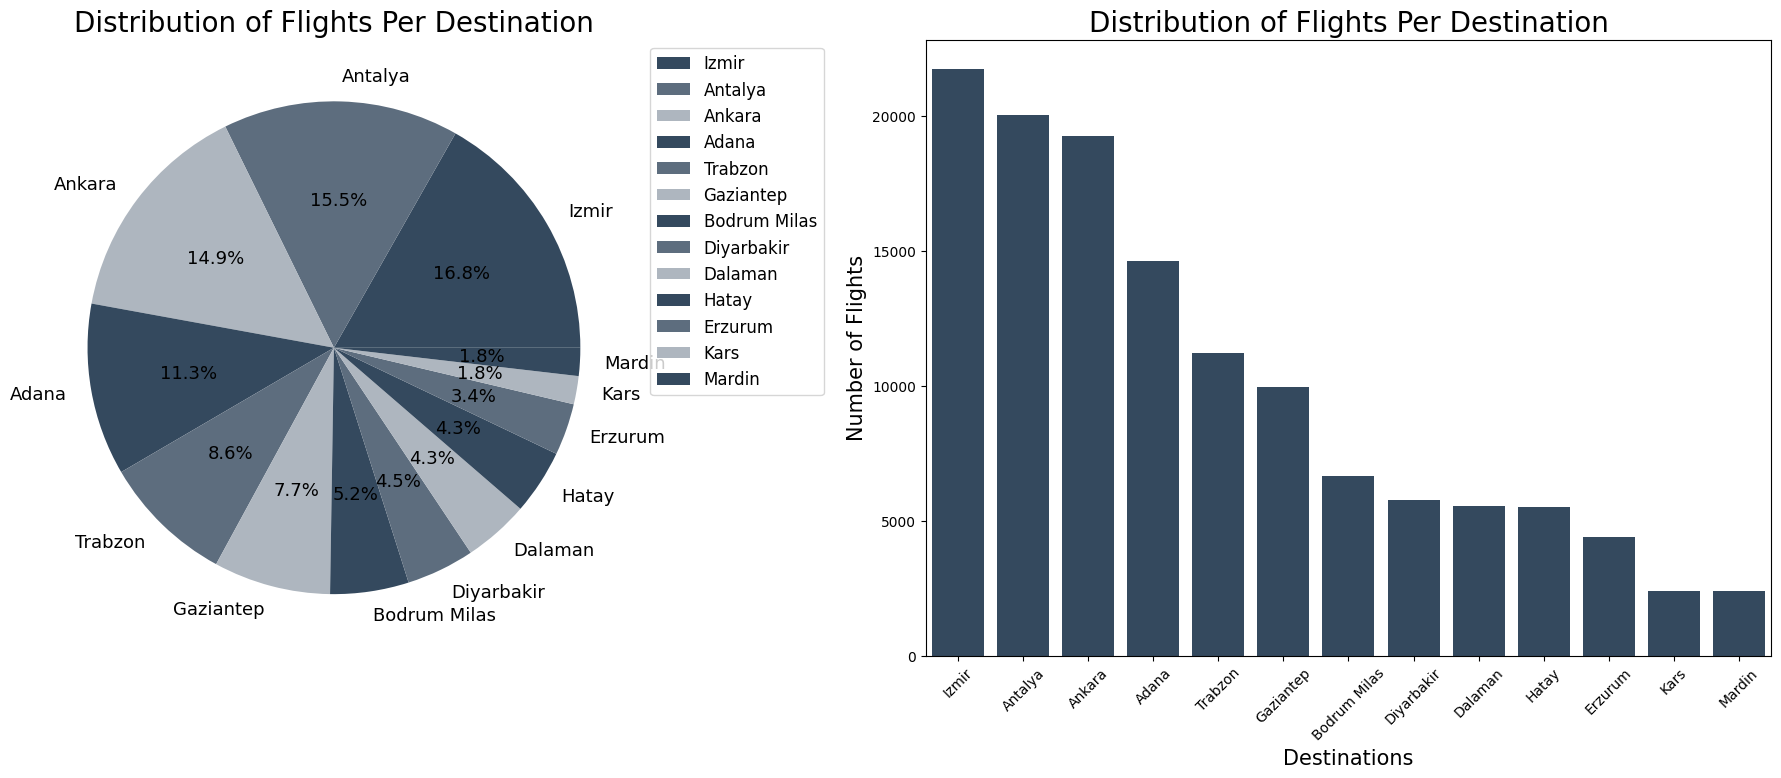

In [17]:
f,ax=plt.subplots(1,2,figsize=(24,8))

ax[0] = df["arrival_city"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], fontsize=13, colors = ['#34495E', '#5D6D7E', '#AEB6BF'], label='')
ax[0].set_title("Distribution of Flights Per Destination", fontsize=20)
ax[0].legend(bbox_to_anchor=(1, 1), fontsize=12)

ax[1] = sns.countplot(x=df["arrival_city"], order = df['arrival_city'].value_counts().index, color='#34495E', saturation=1).set_title('Distribution of Flights Per Destination', fontsize=20)
plt.xlabel('Destinations',fontsize=15)
plt.ylabel('Number of Flights',fontsize=15)
plt.xticks(rotation=45)


plt.show()

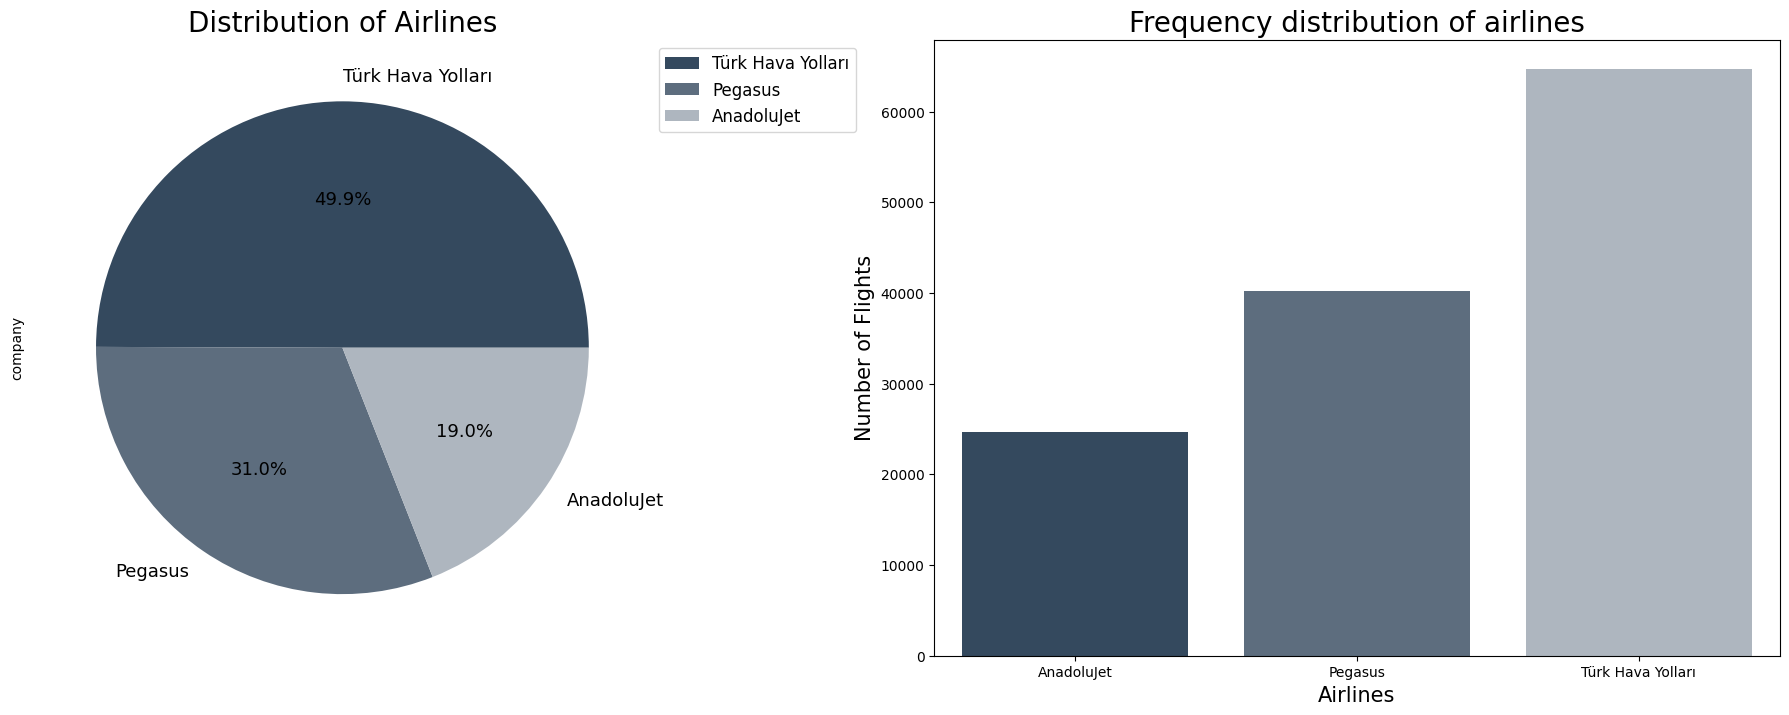

In [18]:

f,ax=plt.subplots(1,2,figsize=(24,8))

ax[0] = df["company"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], fontsize=13, colors = ['#34495E', '#5D6D7E', '#AEB6BF'])
ax[0].set_title("Distribution of Airlines", fontsize=20)
ax[0].legend(bbox_to_anchor=(1, 1), fontsize=12)

ax[1] = sns.countplot(x="company", data=df, palette=['#34495E', '#5D6D7E', '#AEB6BF'], saturation=1)
ax[1].set_title("Frequency distribution of airlines", fontsize=20)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Number of Flights',fontsize=15)

plt.show()

Text(0, 0.5, 'Number of Flights')

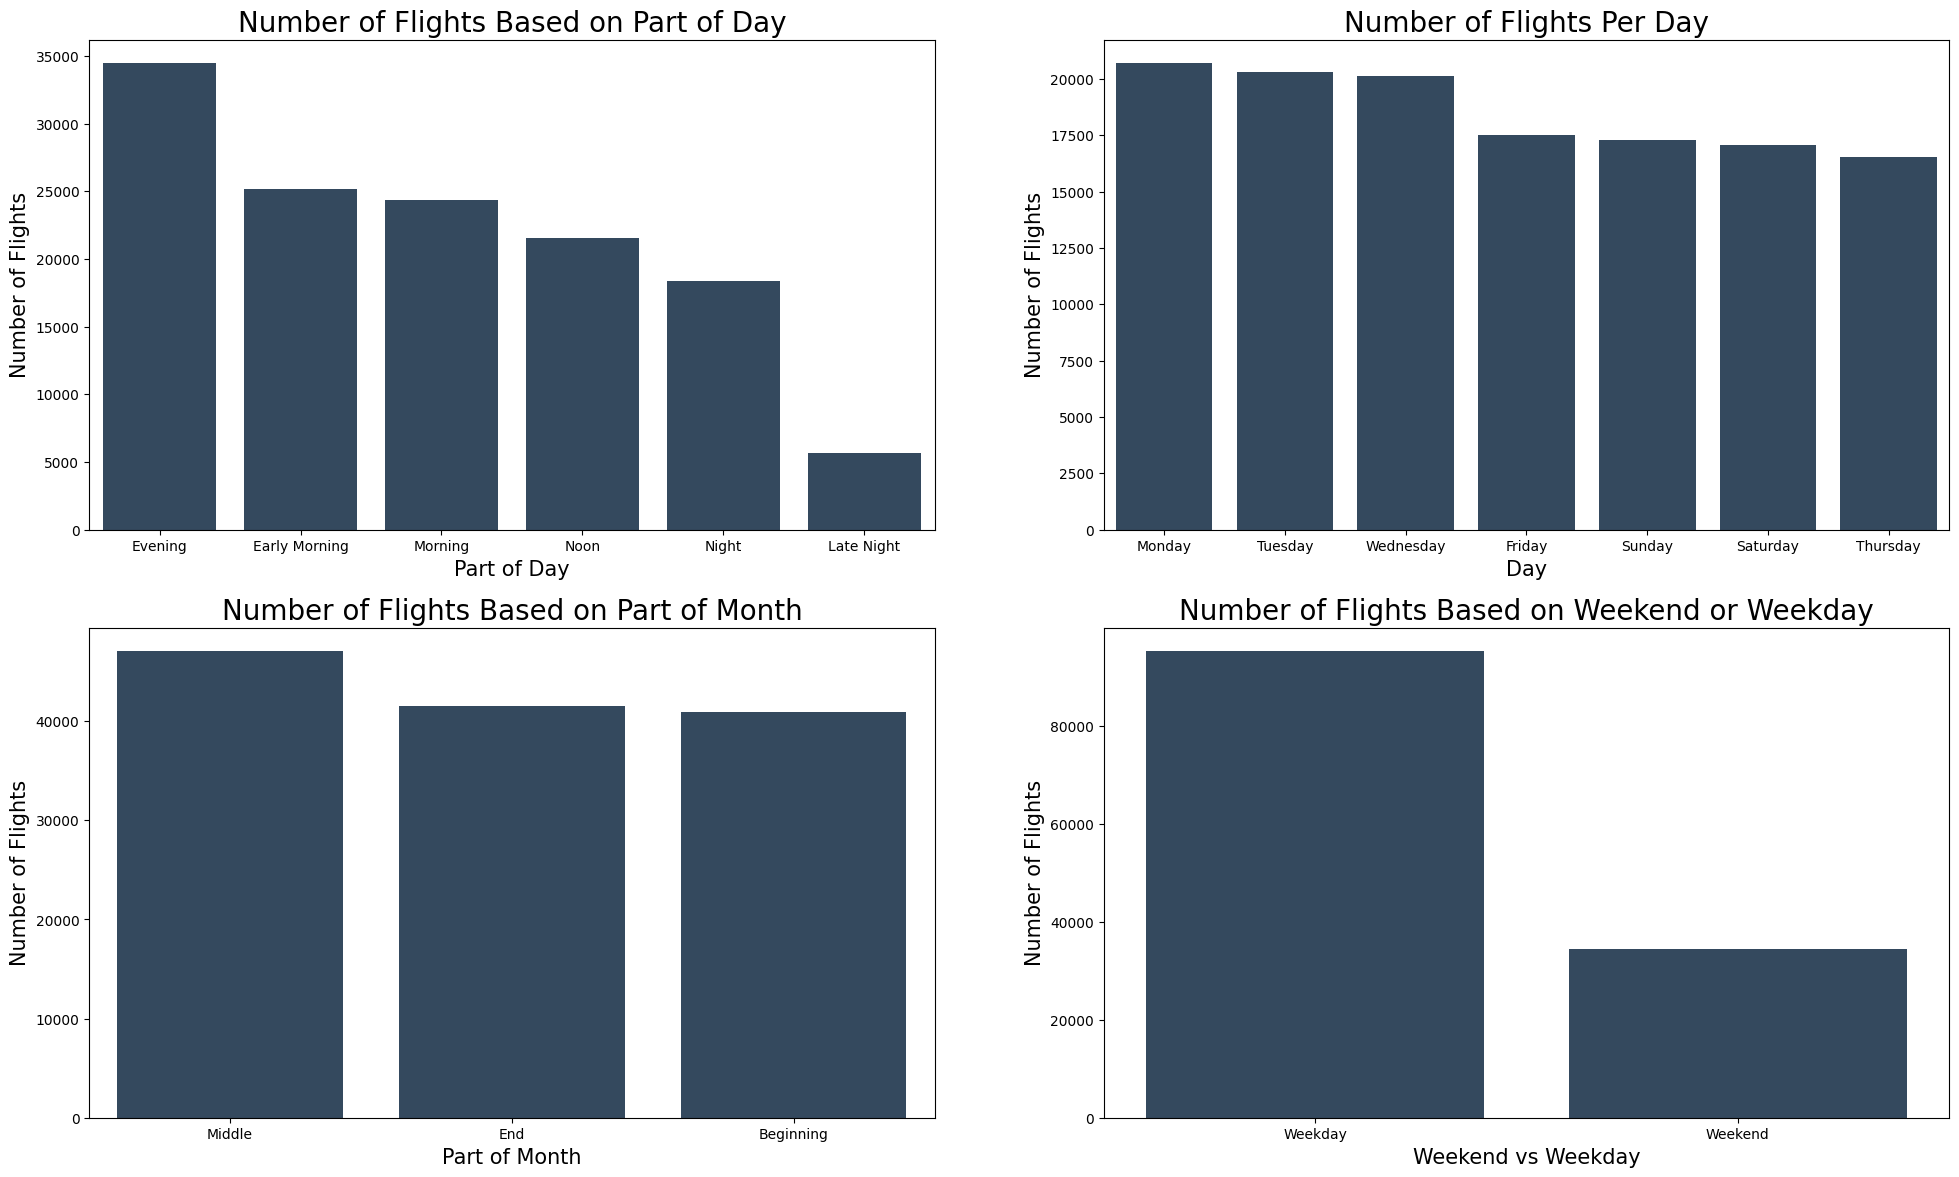

In [19]:
fig = plt.figure(figsize=(24,14))

plt.subplot(2, 2, 1)
sns.countplot(x="part_of_day", data=df, order = df['part_of_day'].value_counts().index, palette=['#34495E'], saturation=1)
plt.title("Number of Flights Based on Part of Day", fontsize=20)
plt.xlabel('Part of Day',fontsize=15)
plt.ylabel('Number of Flights',fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x="departure_week_day", data=df, order = df['departure_week_day'].value_counts().index, palette=['#34495E'], saturation=1)
plt.title("Number of Flights Per Day", fontsize=20)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Number of Flights',fontsize=15)

plt.subplot(2, 2, 3)
sns.countplot(x="part_of_month", data=df, order = df['part_of_month'].value_counts().index, palette=['#34495E'], saturation=1)
plt.title("Number of Flights Based on Part of Month", fontsize=20)
plt.xlabel('Part of Month',fontsize=15)
plt.ylabel('Number of Flights',fontsize=15)

plt.subplot(2, 2, 4)
sns.countplot(x="is_weekend", data=df, palette=['#34495E'], saturation=1)
plt.title("Number of Flights Based on Weekend or Weekday", fontsize=20)
plt.xlabel('Weekend vs Weekday',fontsize=15)
plt.ylabel('Number of Flights',fontsize=15)

(array([0, 1]), [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

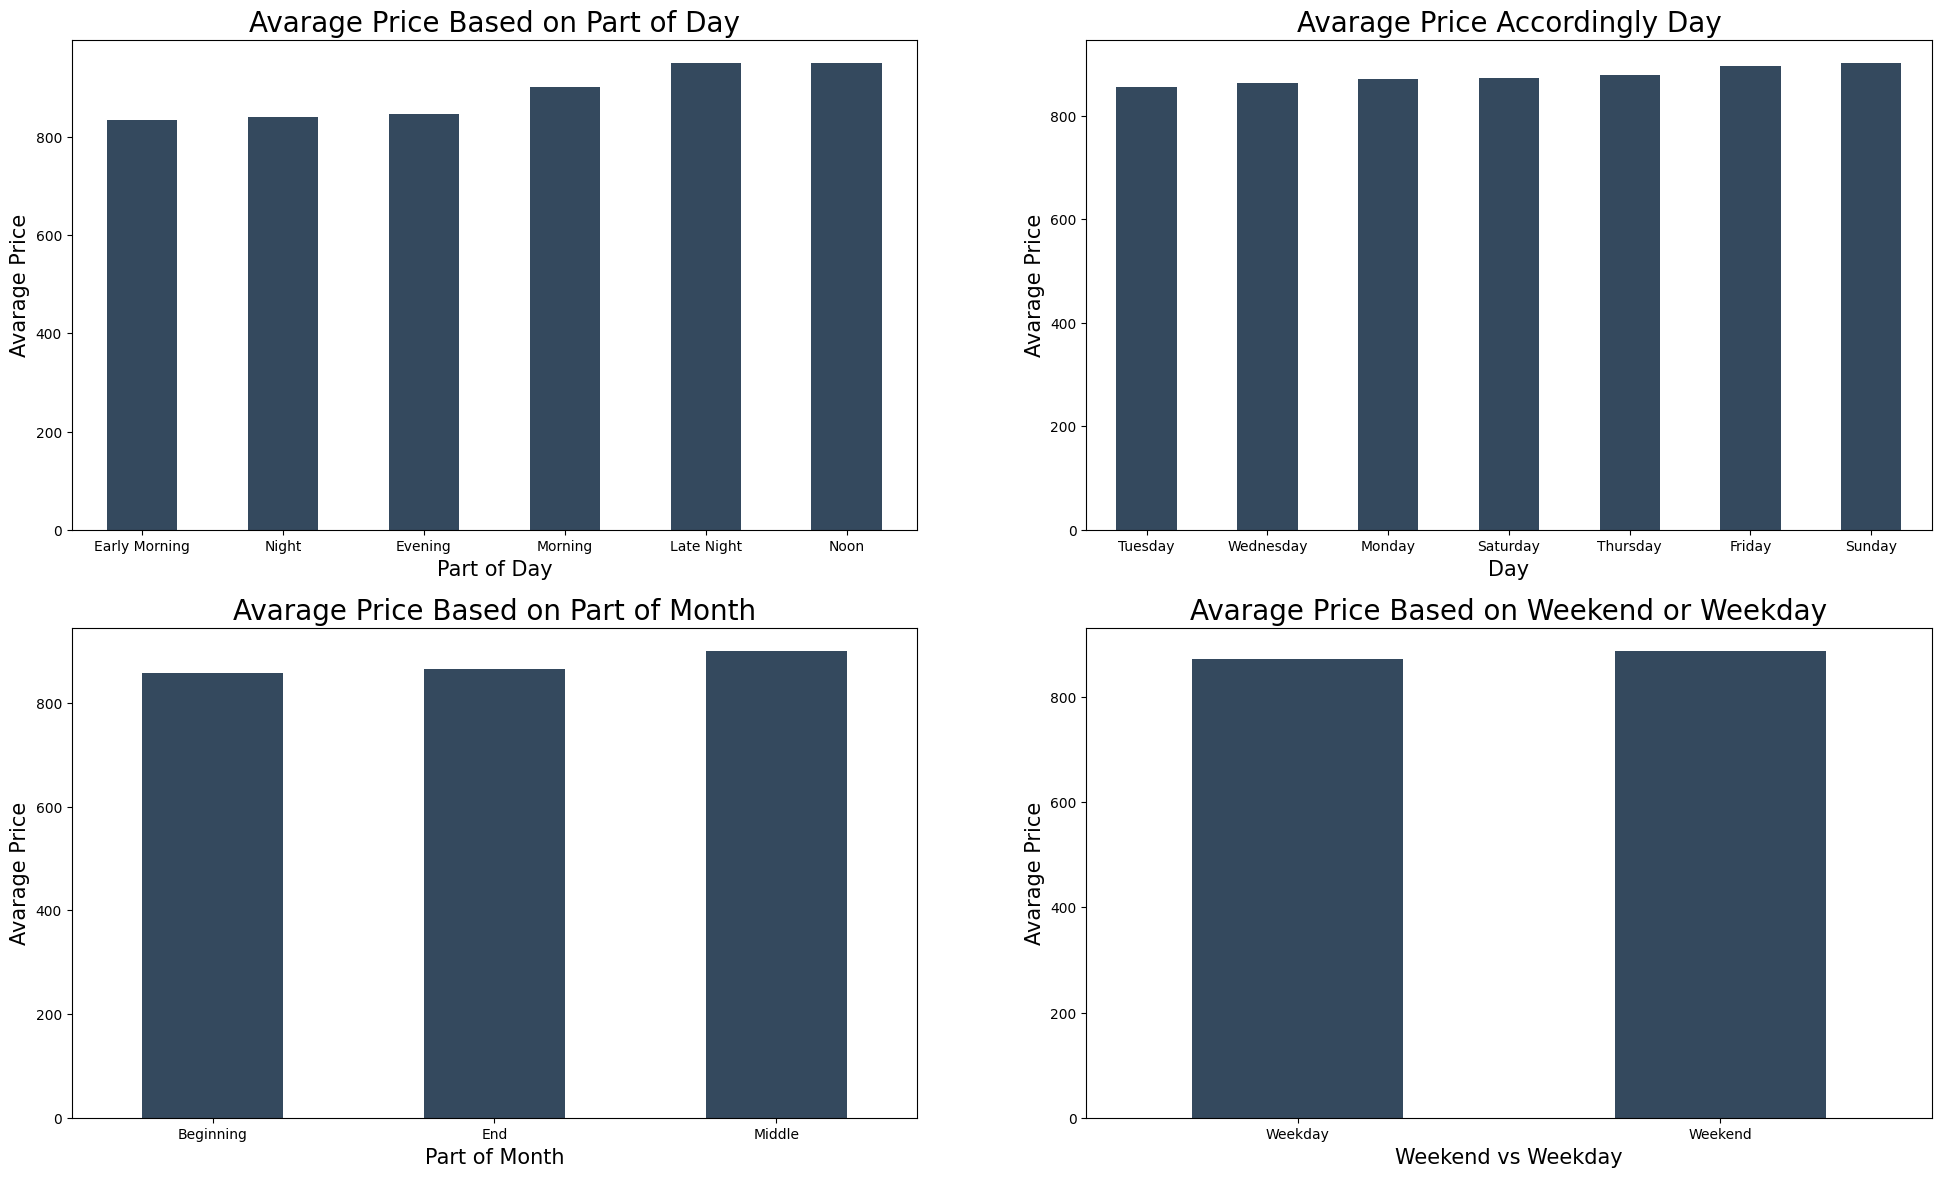

In [20]:
fig = plt.figure(figsize=(24,14))

plt.subplot(2, 2, 1)
df.groupby('part_of_day')['price_try'].mean().sort_values().plot.bar(color=['#34495E'])
plt.title("Avarage Price Based on Part of Day", fontsize=20)
plt.xlabel('Part of Day',fontsize=15)
plt.ylabel('Avarage Price',fontsize=15)
plt.xticks(rotation = 0)

plt.subplot(2, 2, 2)
df.groupby('departure_week_day')['price_try'].mean().sort_values().plot.bar(color=['#34495E'])
plt.title("Avarage Price Accordingly Day", fontsize=20)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Avarage Price',fontsize=15)
plt.xticks(rotation = 0)


plt.subplot(2, 2, 3)
df.groupby('part_of_month')['price_try'].mean().sort_values().plot.bar(color=['#34495E'])
plt.title("Avarage Price Based on Part of Month", fontsize=20)
plt.xlabel('Part of Month',fontsize=15)
plt.ylabel('Avarage Price',fontsize=15)
plt.xticks(rotation = 0)


plt.subplot(2, 2, 4)
df.groupby('is_weekend')['price_try'].mean().sort_values().plot.bar(color=['#34495E'])
plt.title("Avarage Price Based on Weekend or Weekday", fontsize=20)
plt.xlabel('Weekend vs Weekday',fontsize=15)
plt.ylabel('Avarage Price',fontsize=15)
plt.xticks(rotation = 0)


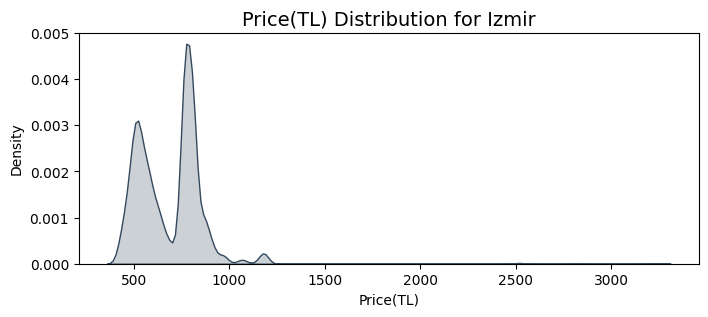

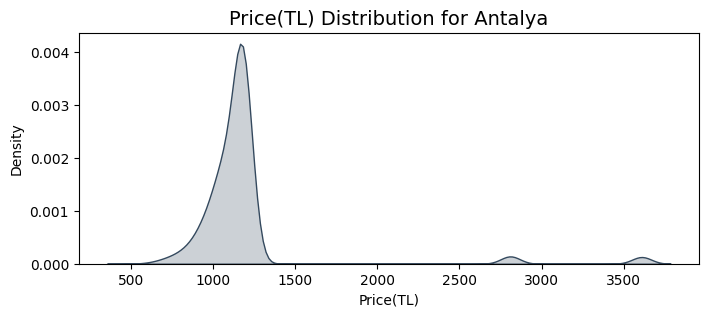

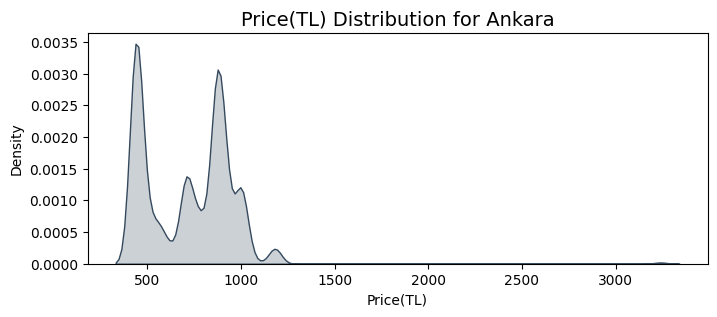

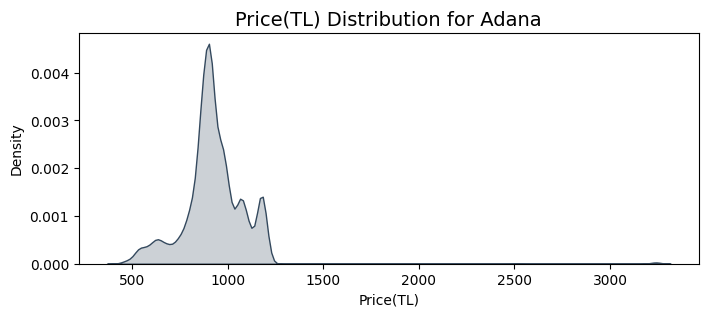

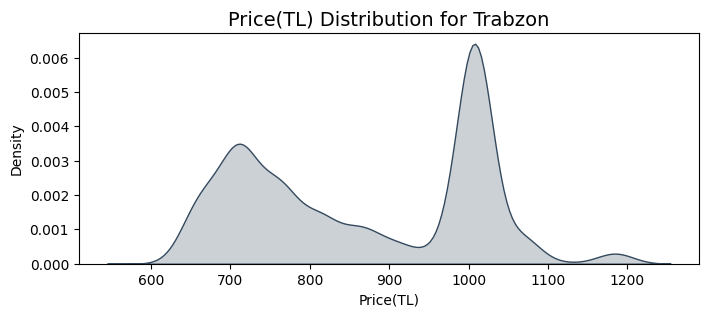

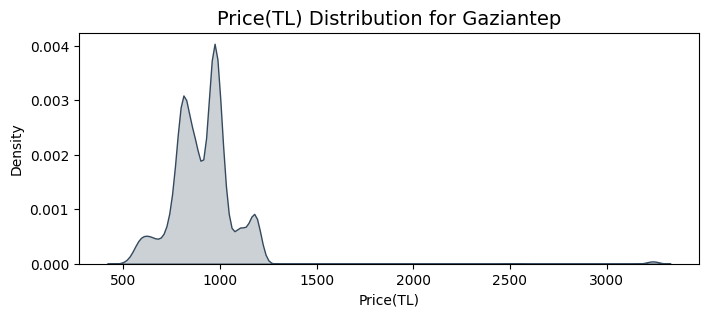

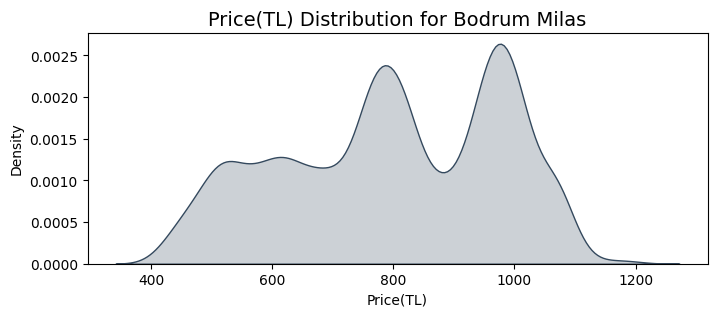

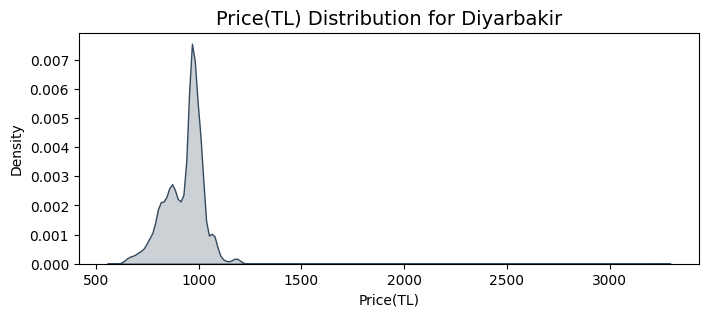

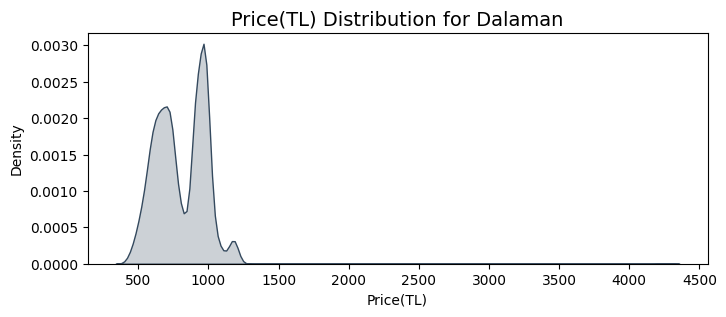

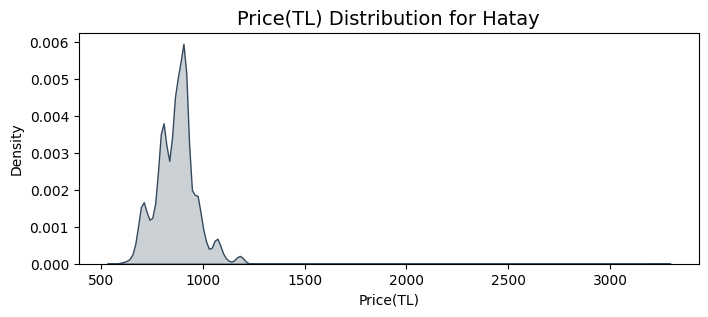

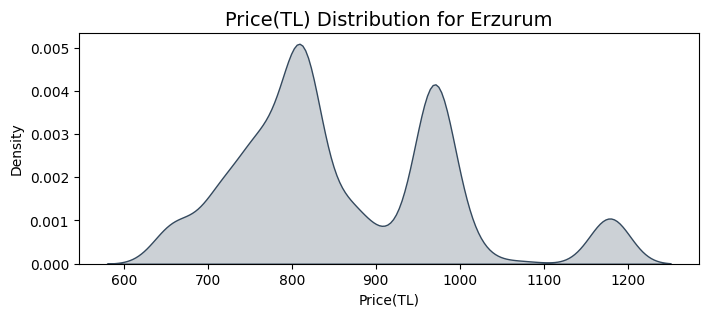

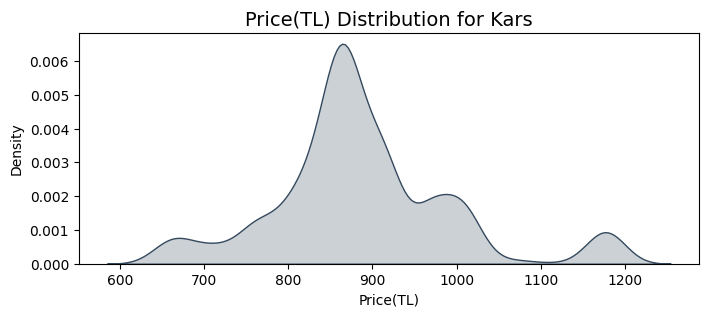

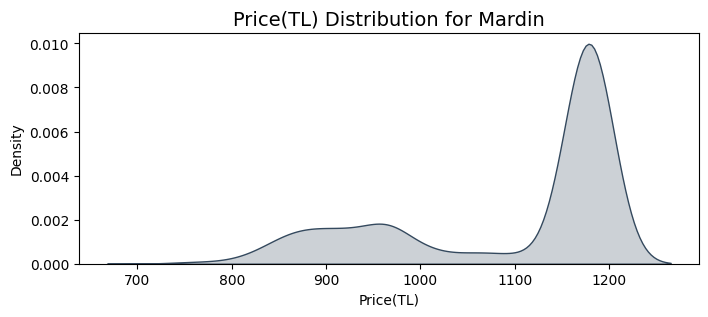

In [21]:

for city in arrival_cities:
    fig = plt.figure(figsize=(8,3))

    df_filtered_by_city=df[df["arrival_city"]==city]
    x = pd.Series(df_filtered_by_city['price_try'], name="Price(TL)")
    
    ax = sns.kdeplot(x, color='#34495E', fill=True)
    ax.set_title("Price(TL) Distribution for {}".format(city), fontsize=14)
    plt.show()


C:\Users\kogla\AppData\Local\Temp\ipykernel_612\1031936646.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2=sns.histplot(x = 'price_try', data = df, kde = True, palette=['#34495E'])


Text(0.5, 0, 'Price (TL)')

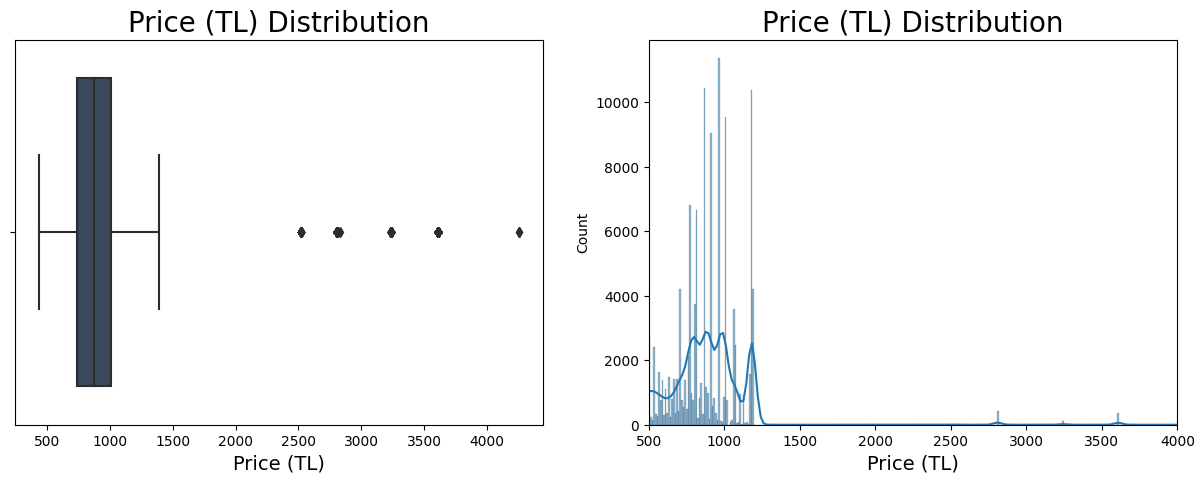

In [22]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1=sns.boxplot(x = 'price_try', data = df, palette=['#34495E'])
ax1.set_title('Price (TL) Distribution', fontsize=20)
ax1.set_xlabel('Price (TL)',fontsize=14)

plt.subplot(1,2,2)
ax2=sns.histplot(x = 'price_try', data = df, kde = True, palette=['#34495E'])
ax2.set_xlim(500, 4000)

ax2.set_title('Price (TL) Distribution', fontsize=20)
ax2.set_xlabel('Price (TL)',fontsize=14)

Text(0.5, 0, 'Duration (min)')

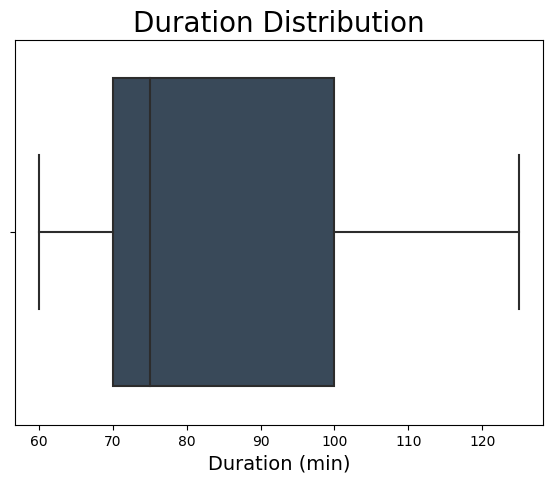

In [23]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax1=sns.boxplot(x = 'duration(min)', data = df, palette=['#34495E'])
ax1.set_title('Duration Distribution', fontsize=20)
ax1.set_xlabel('Duration (min)',fontsize=14)

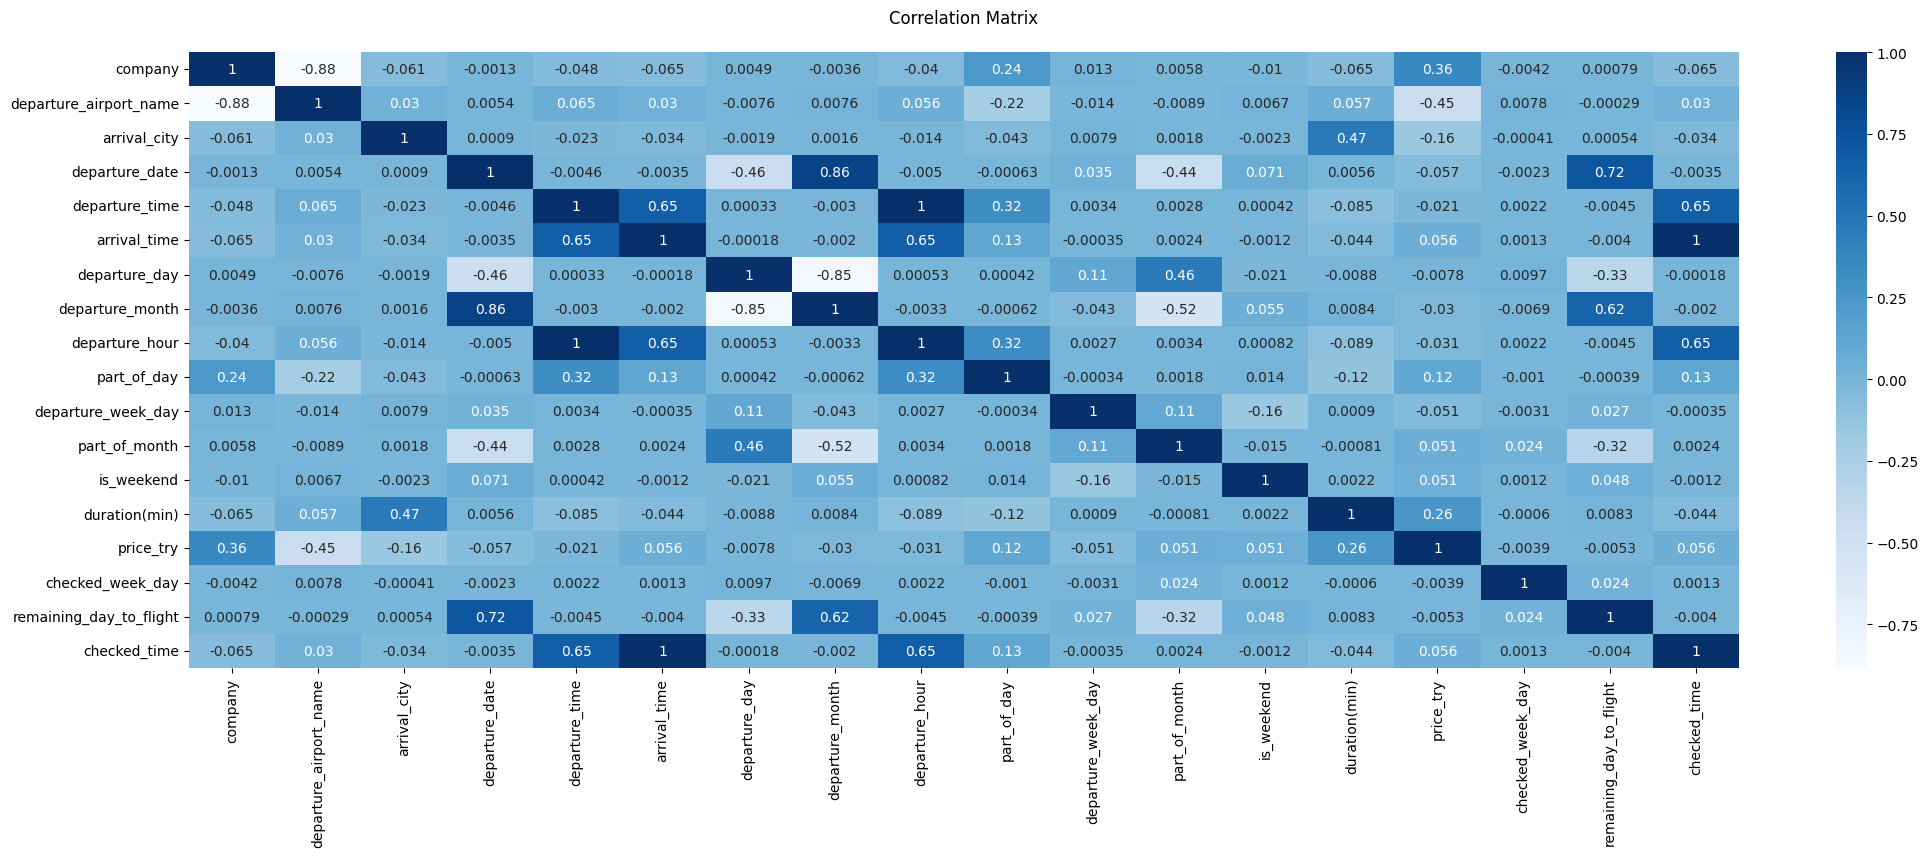

In [24]:
plt.figure(figsize=(25,8))
plt.title('Correlation Matrix\n')
sns.heatmap(df_numeric.corr(),annot=True, cmap="Blues")
plt.show()

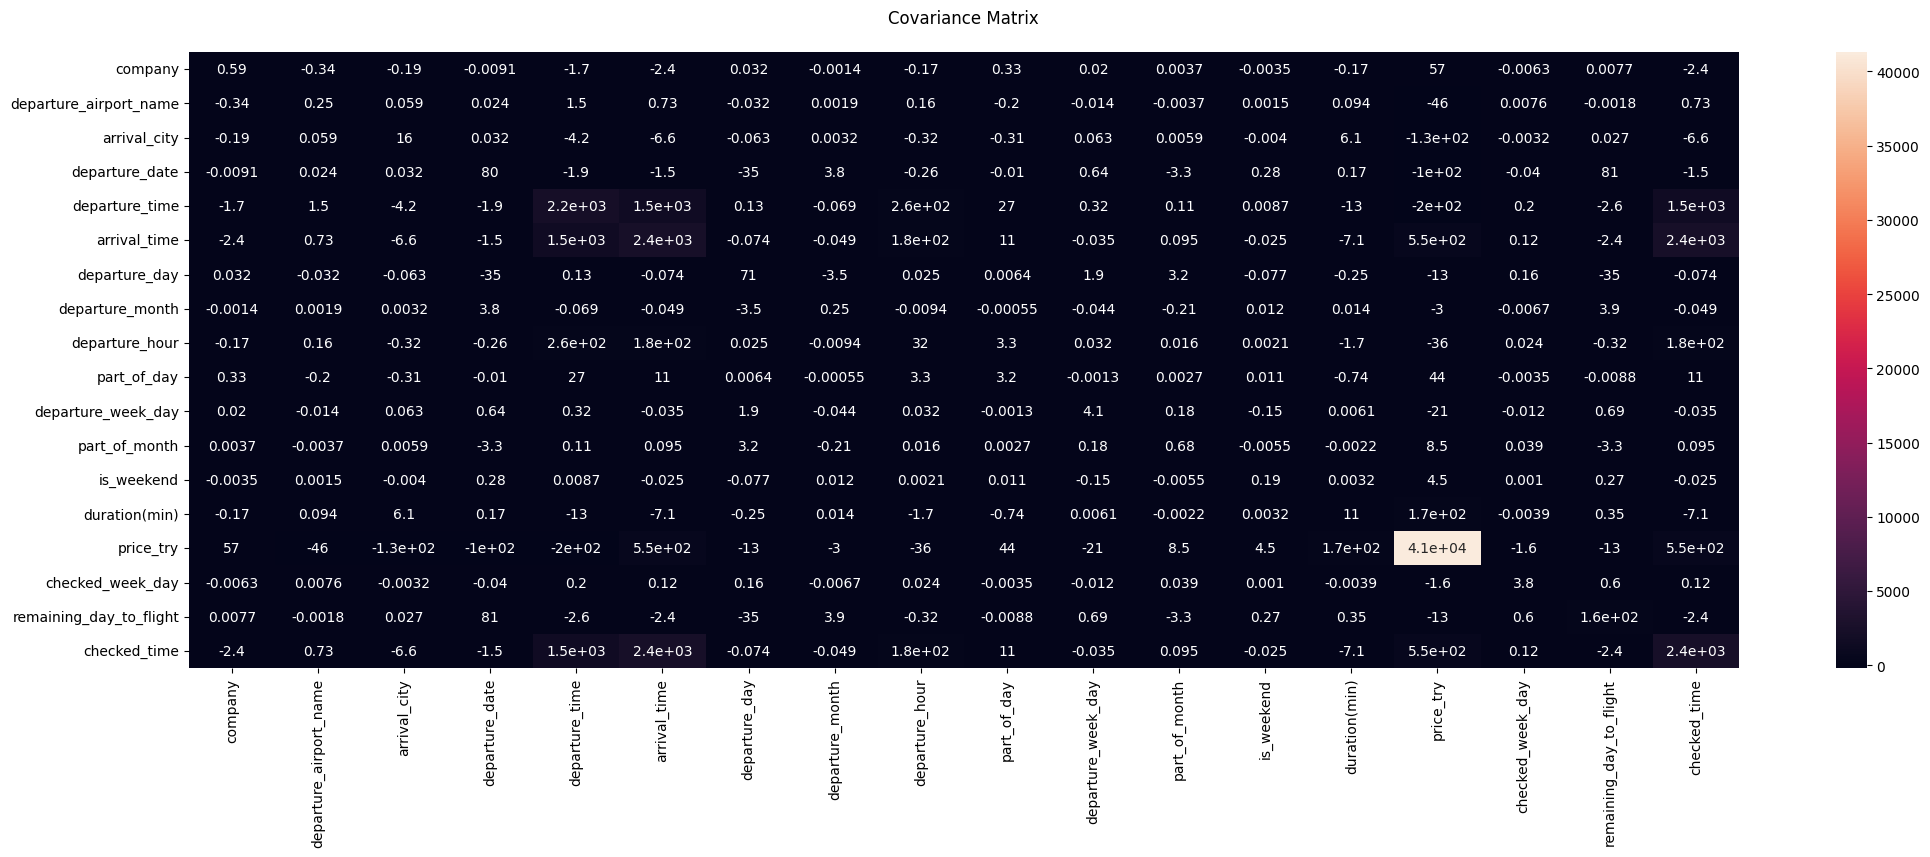

In [25]:
plt.figure(figsize=(25,8))
plt.title('Covariance Matrix\n')
sns.heatmap(df_numeric.cov(),annot=True)
plt.show()

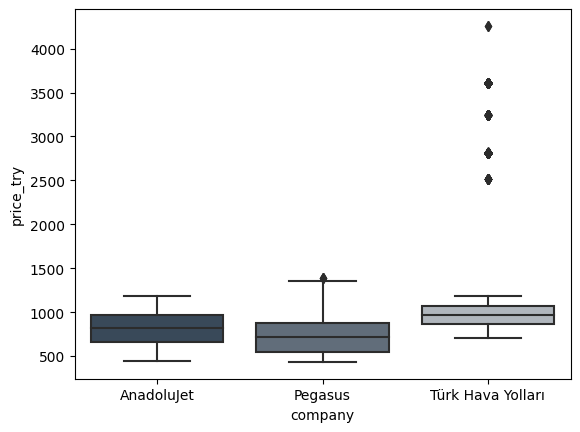

In [26]:
sns.boxplot(y = "price_try", x = "company", data = df.sort_values("price_try", ascending = False), palette=['#34495E', '#5D6D7E','#AEB6BF'])
plt.show()

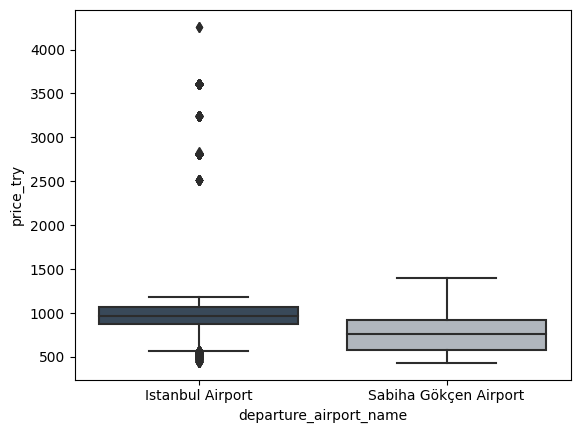

In [27]:
sns.boxplot(y = "price_try", x = "departure_airport_name", data = df.sort_values("price_try", ascending = False),palette=['#34495E', '#AEB6BF'])

plt.show()

Text(0, 0.5, 'Price (TL)')

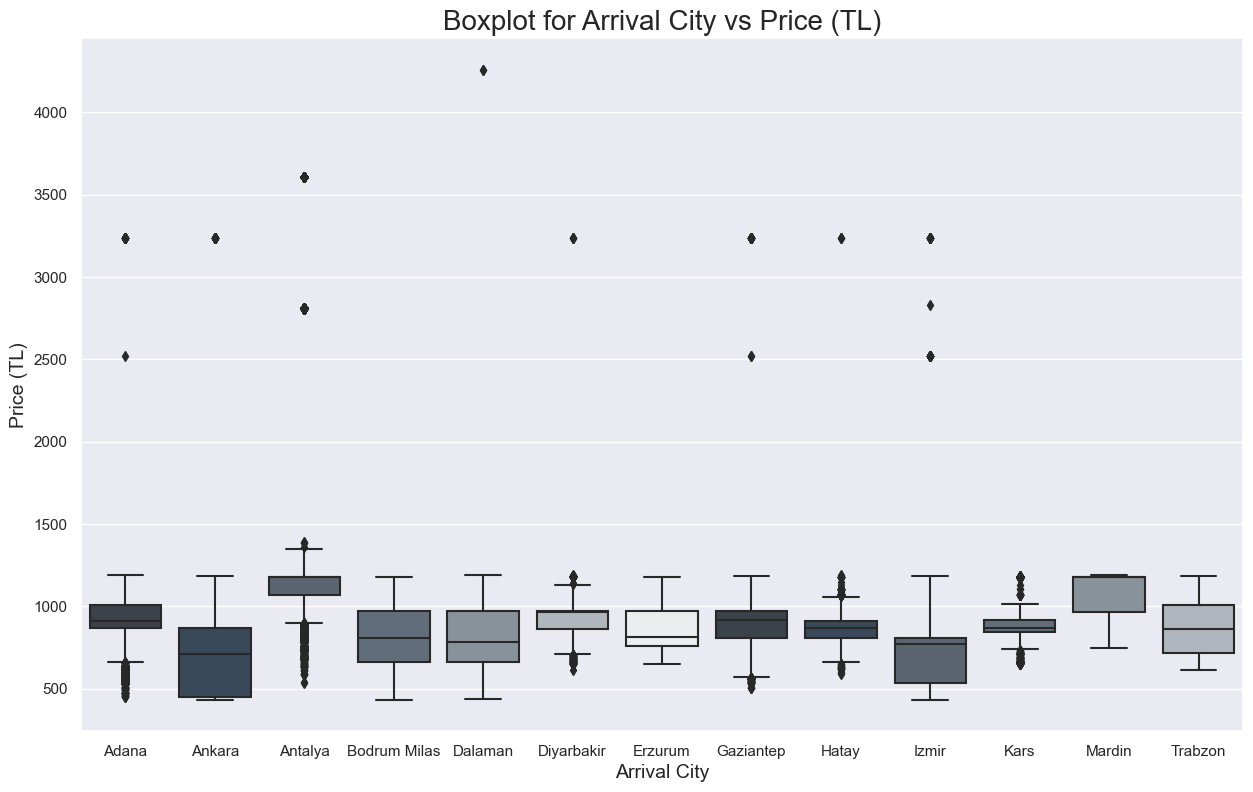

In [28]:
sns.set(rc={'figure.figsize':(15,9)})


ax=sns.boxplot(x="arrival_city", y="price_try", data=df, palette=['#38424d','#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])
ax.set_title('Boxplot for Arrival City vs Price (TL)', fontsize=20)
ax.set_xlabel('Arrival City',fontsize=14)
ax.set_ylabel('Price (TL)',fontsize=14)


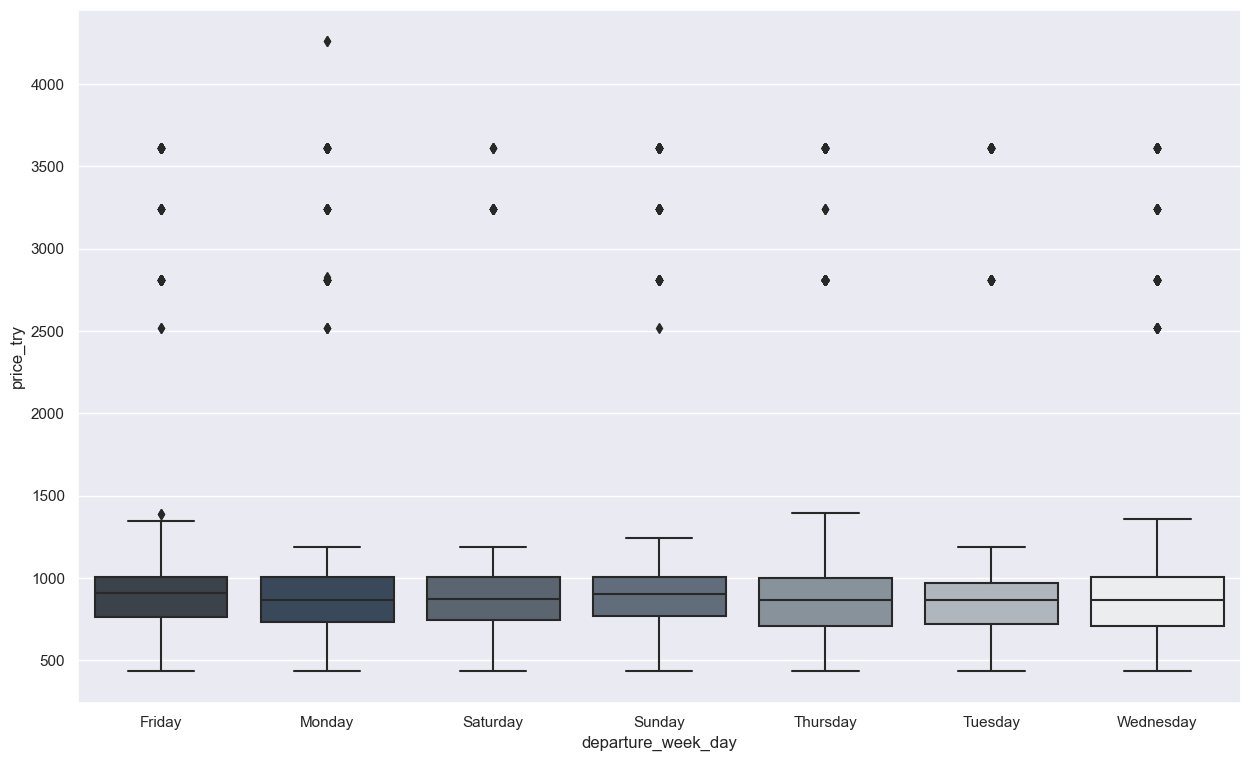

In [29]:
sns.boxplot(y = "price_try", x = "departure_week_day", data = df, palette=['#38424d','#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])
plt.show()

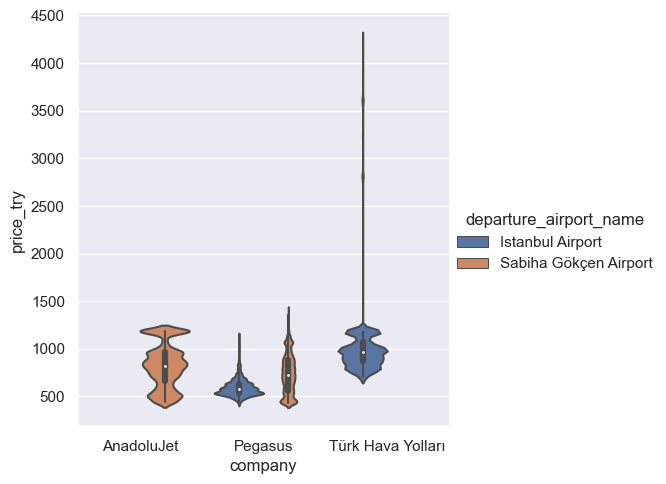

In [30]:
sns.catplot(x='company',y='price_try',hue='departure_airport_name',kind='violin',data=df)


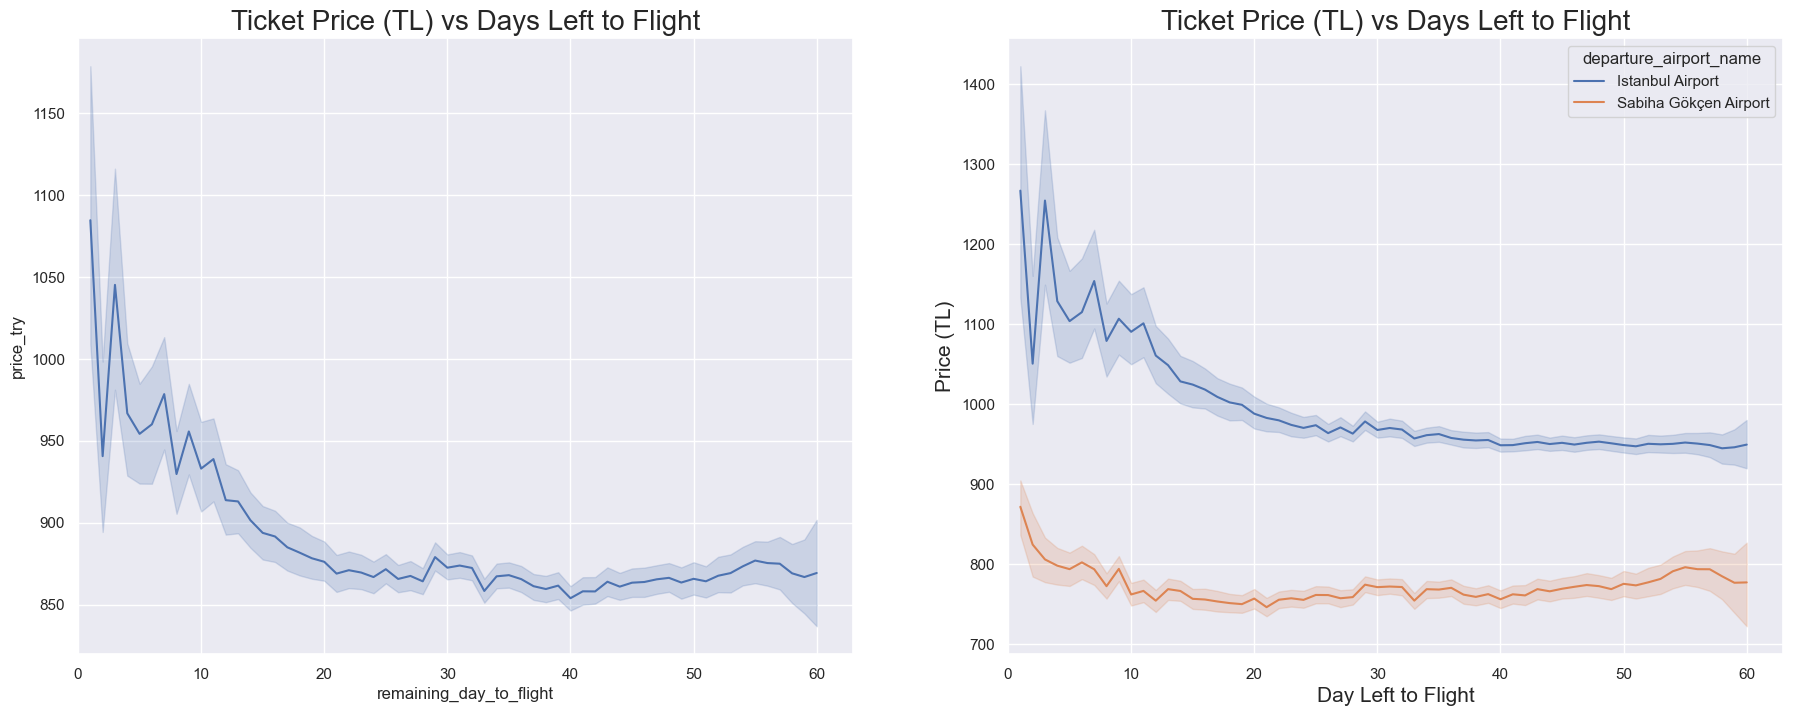

In [31]:

f,ax=plt.subplots(1,2,figsize=(22,8))

ax[0]=sns.lineplot(data = df, x = 'remaining_day_to_flight', y= 'price_try', ax=ax[0])
ax[0].set_title('Ticket Price (TL) vs Days Left to Flight', fontsize=20)
plt.xlabel('Day Left to Flight',fontsize=15)
plt.ylabel('Price (TL)',fontsize=15)
ax[0].set(xlim=(0, None))

ax[1] = sns.lineplot(data = df, x = 'remaining_day_to_flight', y= 'price_try', hue = 'departure_airport_name')
ax[1].set_title('Ticket Price (TL) vs Days Left to Flight', fontsize=20)
ax[1].set(xlim=(0, None))
plt.xlabel('Day Left to Flight',fontsize=15)
plt.ylabel('Price (TL)',fontsize=15)



plt.show()

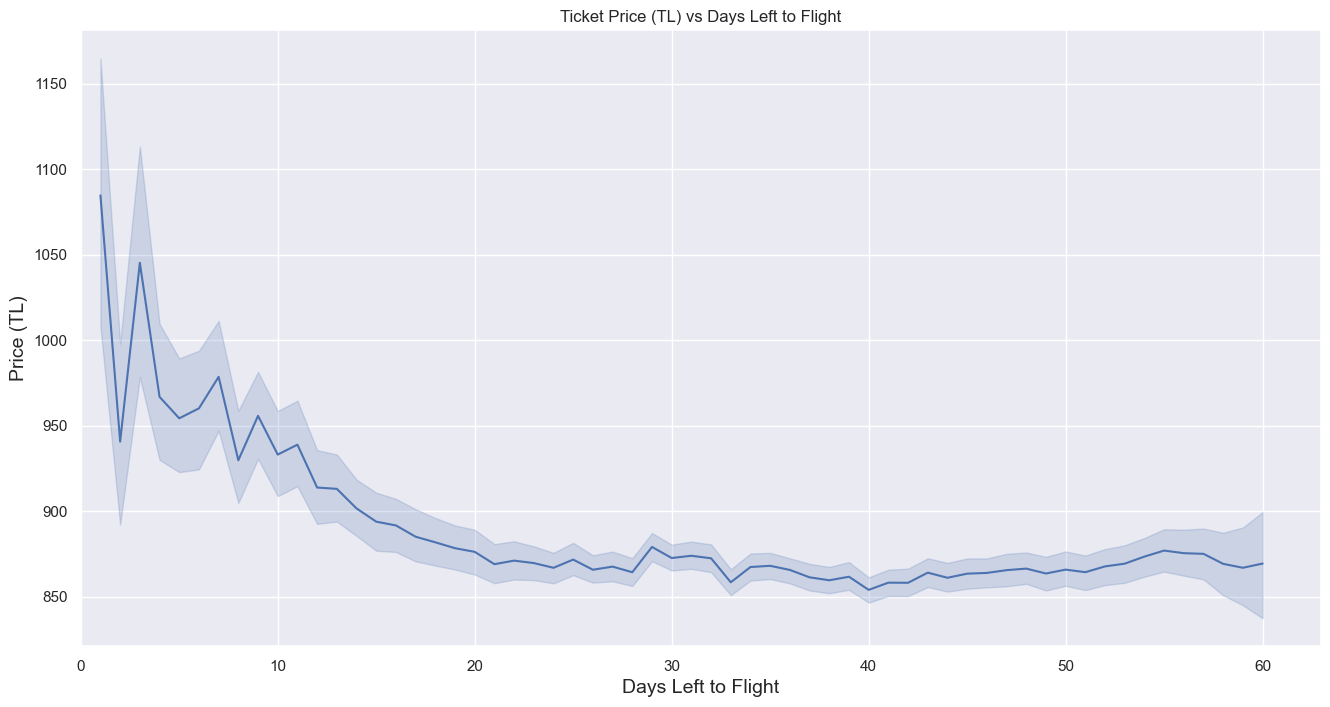

In [32]:
plt.figure(figsize = (16, 8))
ax=sns.lineplot(data = df, x = 'remaining_day_to_flight', y= 'price_try')
plt.title('Ticket Price (TL) vs Days Left to Flight')
plt.xlabel('Days Left to Flight',fontsize=14)
plt.ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))
plt.show()

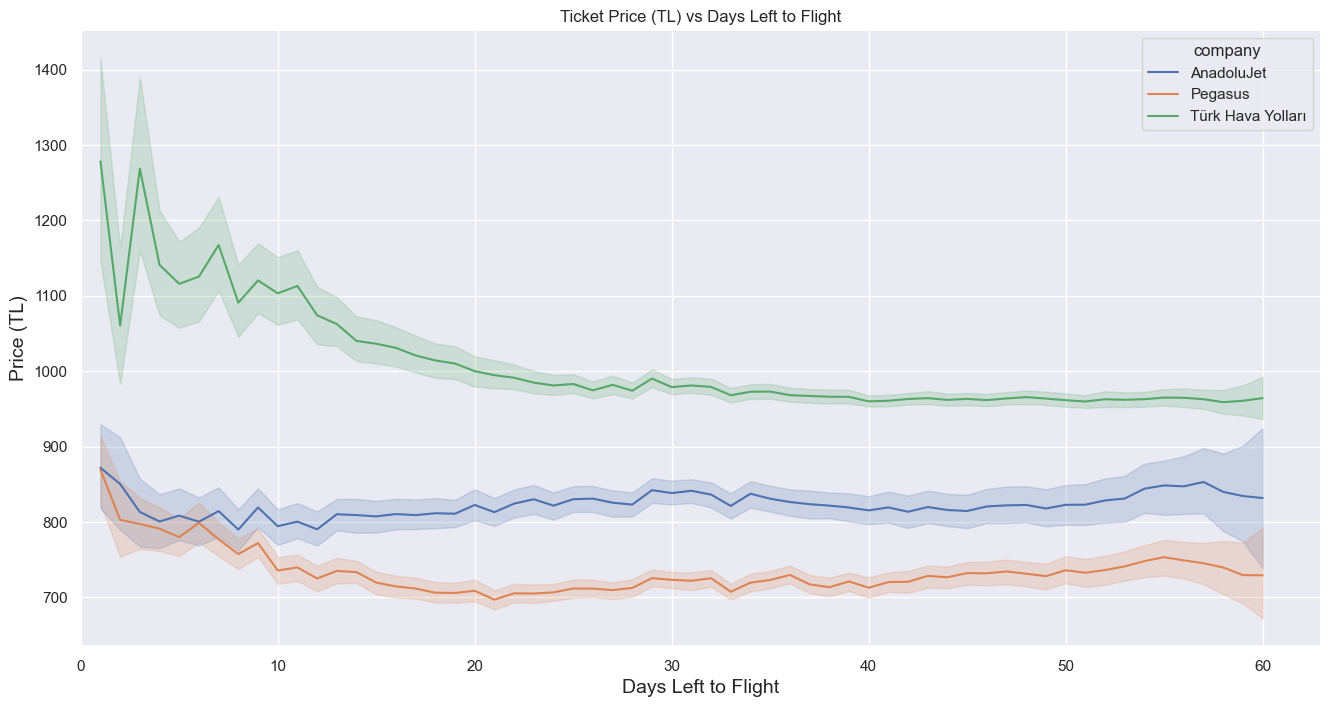

In [33]:
plt.figure(figsize = (16, 8))
ax=sns.lineplot(data = df, x = 'remaining_day_to_flight', y= 'price_try', hue = 'company')
plt.title('Ticket Price (TL) vs Days Left to Flight')
plt.xlabel('Days Left to Flight',fontsize=14)
plt.ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))
plt.show()

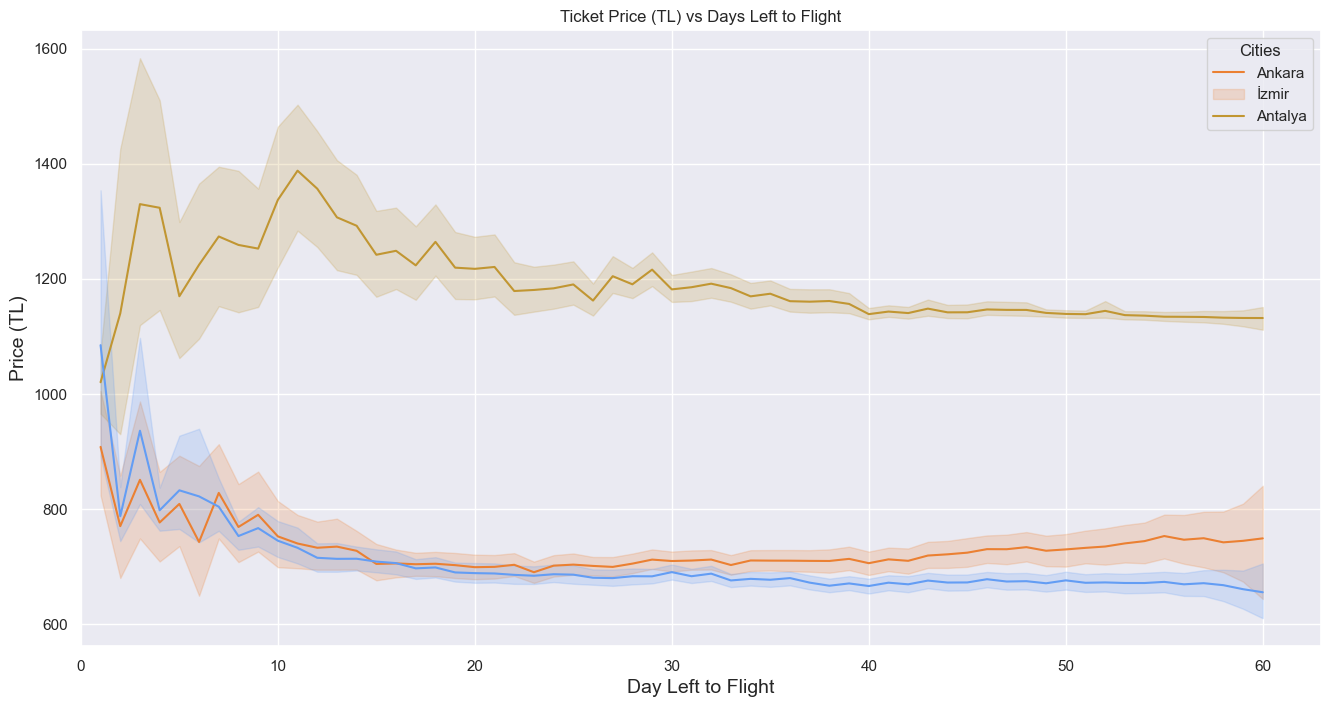

In [34]:
cities=["Izmir", "Antalya", "Ankara"]
plt.figure(figsize = (16, 8))
ax=sns.lineplot(data = df[df.arrival_city.isin(cities)], x = 'remaining_day_to_flight', y= 'price_try', hue = 'arrival_city')
plt.legend(title='Cities', loc='upper right', labels=['Ankara', 'İzmir', 'Antalya'])

plt.title('Ticket Price (TL) vs Days Left to Flight')
plt.xlabel('Day Left to Flight',fontsize=14)
plt.ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))
plt.show()

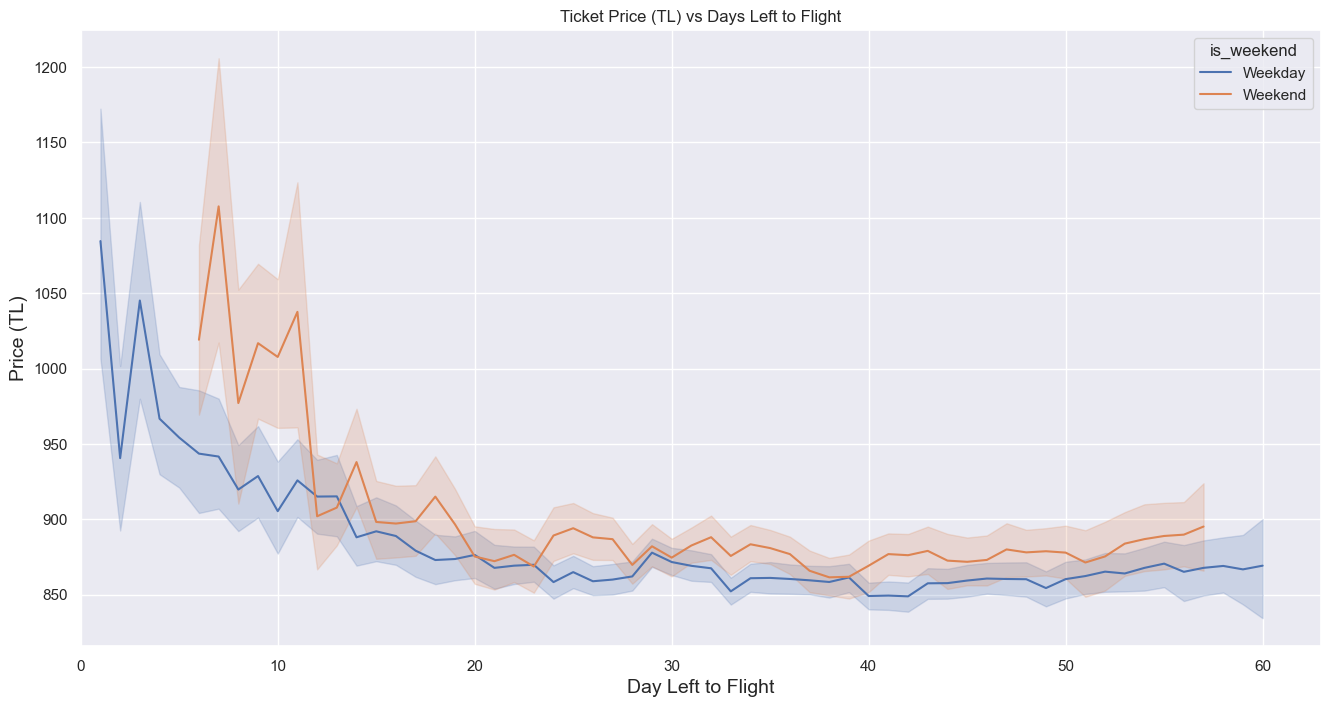

In [35]:
plt.figure(figsize = (16, 8))
ax=sns.lineplot(data = df, x = 'remaining_day_to_flight', y= 'price_try', hue = 'is_weekend')
plt.title('Ticket Price (TL) vs Days Left to Flight')
plt.xlabel('Day Left to Flight',fontsize=14)
plt.ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))
plt.show()

[(0.0, 62.95)]

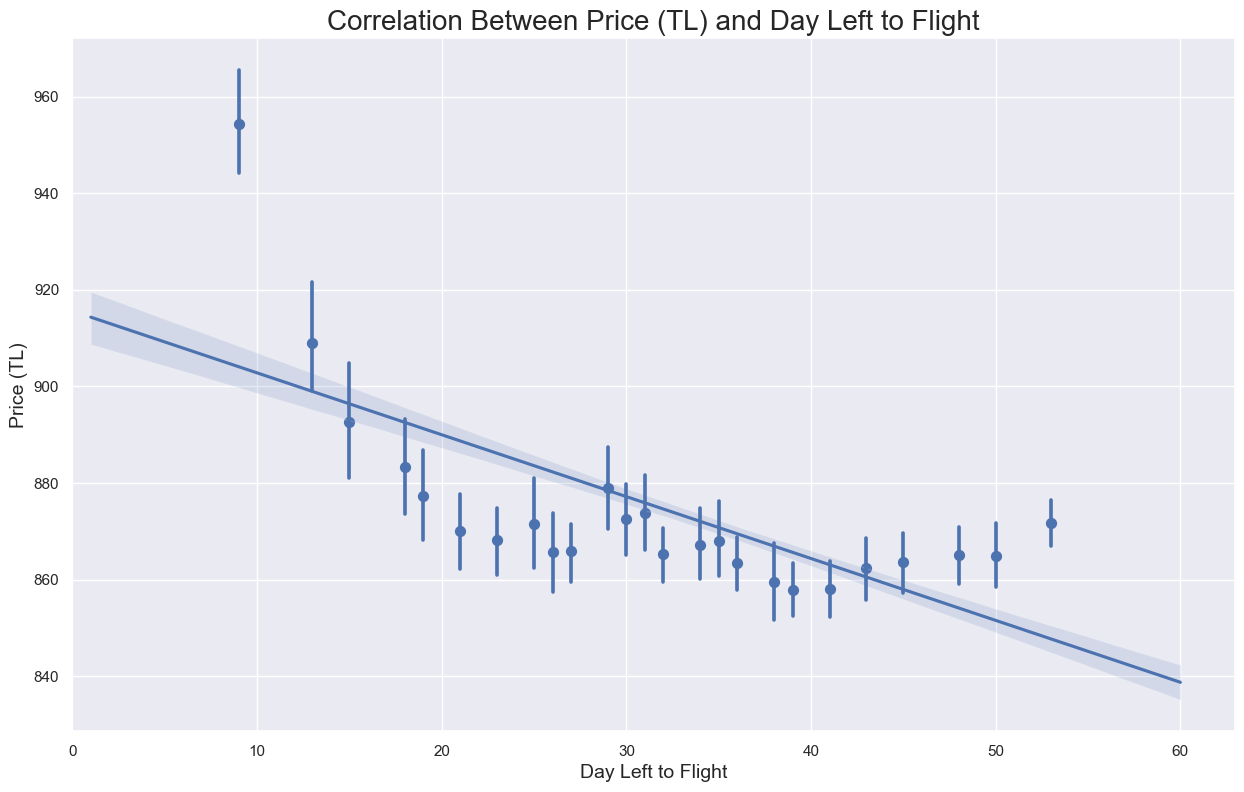

In [36]:
figsize=(22,20)

ax=sns.regplot(x="remaining_day_to_flight", y="price_try", data=df,x_bins=25)

ax.set_title('Correlation Between Price (TL) and Day Left to Flight', fontsize=20)
ax.set_xlabel('Day Left to Flight',fontsize=14)
ax.set_ylabel('Price (TL)',fontsize=14)

ax.set(xlim=(0, None))

[(0.0, 31.45)]

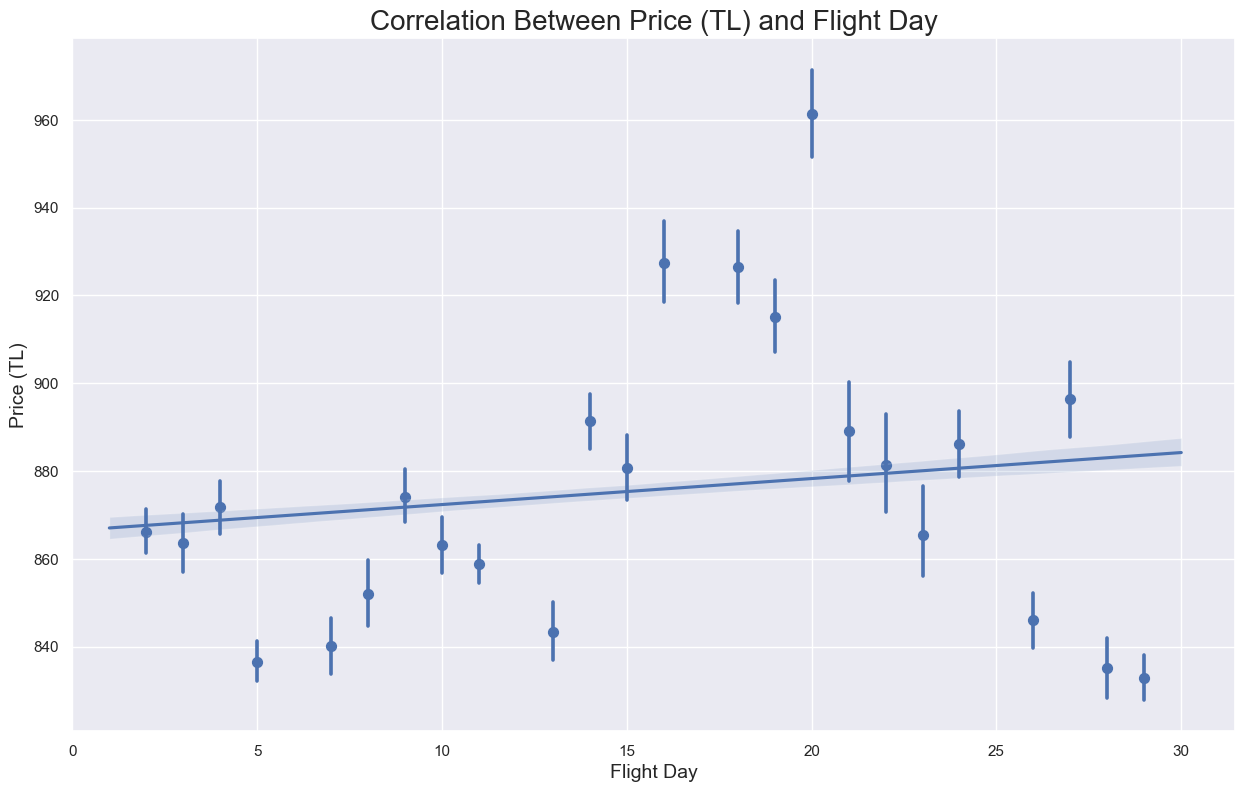

In [37]:
figsize=(22,20)

ax=sns.regplot(x="departure_day", y="price_try", data=df,x_bins=25)

ax.set_title('Correlation Between Price (TL) and Flight Day', fontsize=20)
ax.set_xlabel('Flight Day',fontsize=14)
ax.set_ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))

[(0.0, 24.15)]

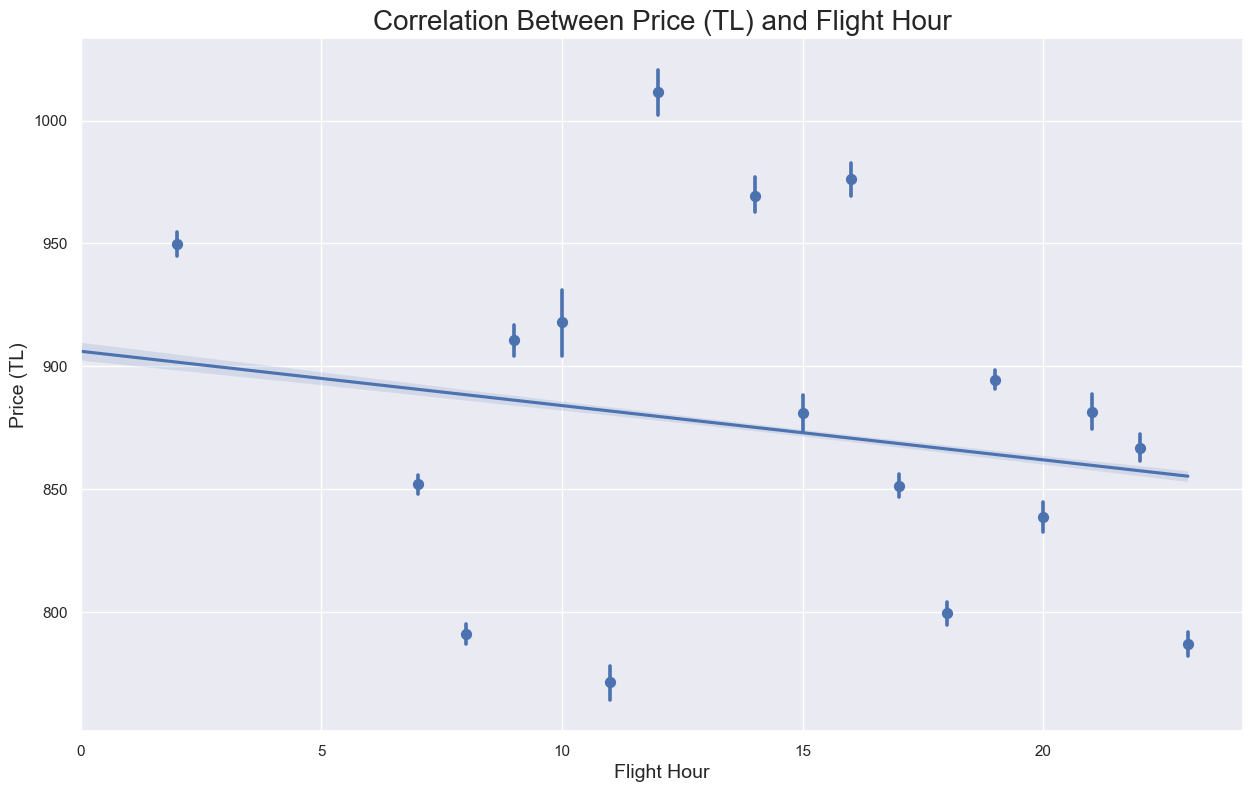

In [38]:
figsize=(22,20)

ax=sns.regplot(x="departure_hour", y="price_try", data=df,x_bins=25)

ax.set_title('Correlation Between Price (TL) and Flight Hour', fontsize=20)
ax.set_xlabel('Flight Hour',fontsize=14)
ax.set_ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))

[(0.0, 128.25)]

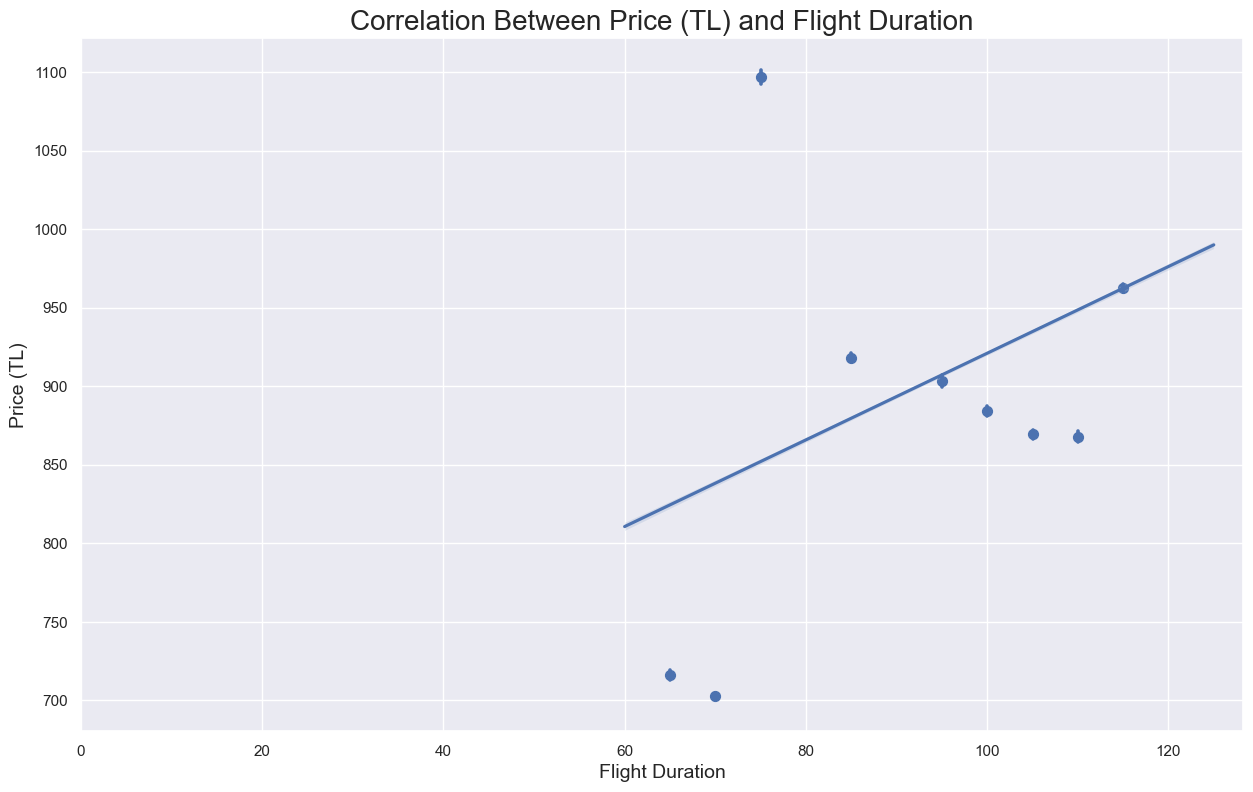

In [39]:
figsize=(22,20)

ax=sns.regplot(x="duration(min)", y="price_try", data=df,x_bins=25)

ax.set_title('Correlation Between Price (TL) and Flight Duration', fontsize=20)
ax.set_xlabel('Flight Duration',fontsize=14)
ax.set_ylabel('Price (TL)',fontsize=14)
ax.set(xlim=(0, None))

Text(0.5, 0, 'Price(TL)')

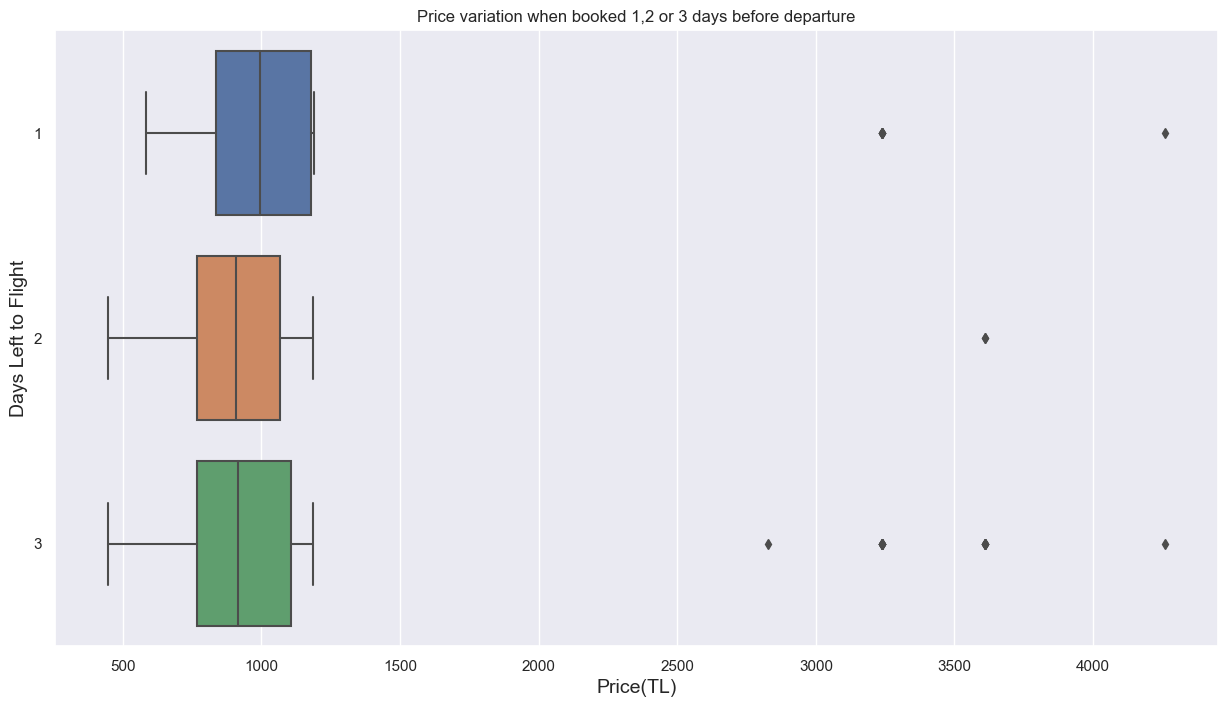

In [40]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='price_try', y='remaining_day_to_flight', data=df[df['remaining_day_to_flight'] < 4], orient='h')
ax.set(title='Price variation when booked 1,2 or 3 days before departure');
ax.set_ylabel('Days Left to Flight',fontsize=14)
ax.set_xlabel('Price(TL)',fontsize=14)
